In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
# from res.plot_lib import set_default, plot_state, print_colourbar

In [ ]:
import tensorflow as tf
tf.random.set_seed(2479)

### Data Preprocessing, for kaggle dataset i filter data only from 2021 to 2022, and combine with data from 4th january to 28th february

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/stock market dataset/BMRA.csv')
df

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,07-09-1984,5.25,5.500,7900,5.50,5.25,5.25
1,10-09-1984,5.25,5.250,600,5.50,5.25,5.25
2,11-09-1984,5.25,5.250,3500,5.50,5.25,5.25
3,12-09-1984,5.50,5.500,700,5.50,5.50,5.50
4,13-09-1984,5.00,5.500,1700,5.50,5.00,5.00
...,...,...,...,...,...,...,...
9640,06-12-2022,3.76,3.800,22400,3.99,3.81,3.81
9641,07-12-2022,3.68,3.750,18000,3.85,3.74,3.74
9642,08-12-2022,3.80,3.820,51600,4.00,3.85,3.85
9643,09-12-2022,3.85,3.930,7800,3.93,3.88,3.88


In [ ]:
seconddf = pd.read_csv('/content/BMRA.csv')
seconddf

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,3.48,3.49,3.38,3.43,3.43,38400
1,2023-01-04,3.57,3.58,3.43,3.56,3.56,13200
2,2023-01-05,3.51,3.51,3.40,3.45,3.45,25400
3,2023-01-06,3.43,3.49,3.32,3.36,3.36,28000
4,2023-01-09,3.33,3.46,3.33,3.40,3.40,41600
5,2023-01-10,3.46,3.54,3.43,3.54,3.54,8400
6,2023-01-11,3.54,3.54,3.04,3.05,3.05,79800
7,2023-01-12,3.12,3.27,2.95,2.95,2.95,45700
8,2023-01-13,3.10,3.20,2.95,3.00,3.00,42800
9,2023-01-17,2.98,3.08,2.93,2.96,2.96,33000


In [ ]:
seconddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       39 non-null     object 
 1   Open       39 non-null     float64
 2   High       39 non-null     float64
 3   Low        39 non-null     float64
 4   Close      39 non-null     float64
 5   Adj Close  39 non-null     float64
 6   Volume     39 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.3+ KB


In [ ]:
seconddf['Date'] = pd.to_datetime(seconddf['Date'])
seconddf

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,3.48,3.49,3.38,3.43,3.43,38400
1,2023-01-04,3.57,3.58,3.43,3.56,3.56,13200
2,2023-01-05,3.51,3.51,3.40,3.45,3.45,25400
3,2023-01-06,3.43,3.49,3.32,3.36,3.36,28000
4,2023-01-09,3.33,3.46,3.33,3.40,3.40,41600
5,2023-01-10,3.46,3.54,3.43,3.54,3.54,8400
6,2023-01-11,3.54,3.54,3.04,3.05,3.05,79800
7,2023-01-12,3.12,3.27,2.95,2.95,2.95,45700
8,2023-01-13,3.10,3.20,2.95,3.00,3.00,42800
9,2023-01-17,2.98,3.08,2.93,2.96,2.96,33000


In [ ]:
seconddf.rename(columns={"Adj Close":"Adjusted Close"},inplace=True)
seconddf

,Date,Open,High,Low,Close,Adjusted Close,Volume
0,2023-01-03,3.48,3.49,3.38,3.43,3.43,38400
1,2023-01-04,3.57,3.58,3.43,3.56,3.56,13200
2,2023-01-05,3.51,3.51,3.40,3.45,3.45,25400
3,2023-01-06,3.43,3.49,3.32,3.36,3.36,28000
4,2023-01-09,3.33,3.46,3.33,3.40,3.40,41600
5,2023-01-10,3.46,3.54,3.43,3.54,3.54,8400
6,2023-01-11,3.54,3.54,3.04,3.05,3.05,79800
7,2023-01-12,3.12,3.27,2.95,2.95,2.95,45700
8,2023-01-13,3.10,3.20,2.95,3.00,3.00,42800
9,2023-01-17,2.98,3.08,2.93,2.96,2.96,33000


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.head())

        Date   Low  Open  Volume  High  Close  Adjusted Close
0 1984-07-09  5.25  5.50    7900   5.5   5.25            5.25
1 1984-10-09  5.25  5.25     600   5.5   5.25            5.25
2 1984-11-09  5.25  5.25    3500   5.5   5.25            5.25
3 1984-12-09  5.50  5.50     700   5.5   5.50            5.50
4 1984-09-13  5.00  5.50    1700   5.5   5.00            5.00


<ipython-input-29-367313604729>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
filterdf = df[df['Date'] > '2021-01-02']
filterdf

,Date,Low,Open,Volume,High,Close,Adjusted Close
9155,2021-04-01,4.95,5.000,168300,5.09,5.06,5.06
9156,2021-05-01,5.01,5.040,102600,5.23,5.09,5.09
9157,2021-06-01,5.03,5.070,169500,5.48,5.14,5.14
9158,2021-07-01,5.23,5.300,116600,5.47,5.47,5.47
9159,2021-08-01,5.24,5.470,107500,5.48,5.33,5.33
...,...,...,...,...,...,...,...
9640,2022-06-12,3.76,3.800,22400,3.99,3.81,3.81
9641,2022-07-12,3.68,3.750,18000,3.85,3.74,3.74
9642,2022-08-12,3.80,3.820,51600,4.00,3.85,3.85
9643,2022-09-12,3.85,3.930,7800,3.93,3.88,3.88


In [ ]:
joindf = filterdf.append(seconddf)
joindf

<ipython-input-31-2166c9bfd17f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  joindf = filterdf.append(seconddf)


,Date,Low,Open,Volume,High,Close,Adjusted Close
9155,2021-04-01,4.95,5.00,168300,5.09,5.06,5.06
9156,2021-05-01,5.01,5.04,102600,5.23,5.09,5.09
9157,2021-06-01,5.03,5.07,169500,5.48,5.14,5.14
9158,2021-07-01,5.23,5.30,116600,5.47,5.47,5.47
9159,2021-08-01,5.24,5.47,107500,5.48,5.33,5.33
...,...,...,...,...,...,...,...
34,2023-02-22,2.84,2.86,21800,2.93,2.84,2.84
35,2023-02-23,2.71,2.86,29400,2.91,2.71,2.71
36,2023-02-24,2.62,2.67,20700,2.77,2.68,2.68
37,2023-02-27,2.65,2.65,14200,2.73,2.67,2.67


In [ ]:
joindf.reset_index(drop=True, inplace=True)
joindf

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,2021-04-01,4.95,5.00,168300,5.09,5.06,5.06
1,2021-05-01,5.01,5.04,102600,5.23,5.09,5.09
2,2021-06-01,5.03,5.07,169500,5.48,5.14,5.14
3,2021-07-01,5.23,5.30,116600,5.47,5.47,5.47
4,2021-08-01,5.24,5.47,107500,5.48,5.33,5.33
...,...,...,...,...,...,...,...
523,2023-02-22,2.84,2.86,21800,2.93,2.84,2.84
524,2023-02-23,2.71,2.86,29400,2.91,2.71,2.71
525,2023-02-24,2.62,2.67,20700,2.77,2.68,2.68
526,2023-02-27,2.65,2.65,14200,2.73,2.67,2.67


In [ ]:
joindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            528 non-null    datetime64[ns]
 1   Low             528 non-null    float64       
 2   Open            528 non-null    float64       
 3   Volume          528 non-null    int64         
 4   High            528 non-null    float64       
 5   Close           528 non-null    float64       
 6   Adjusted Close  528 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 29.0 KB


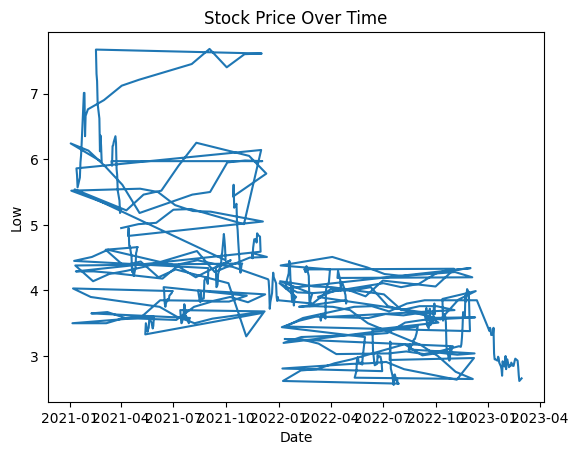

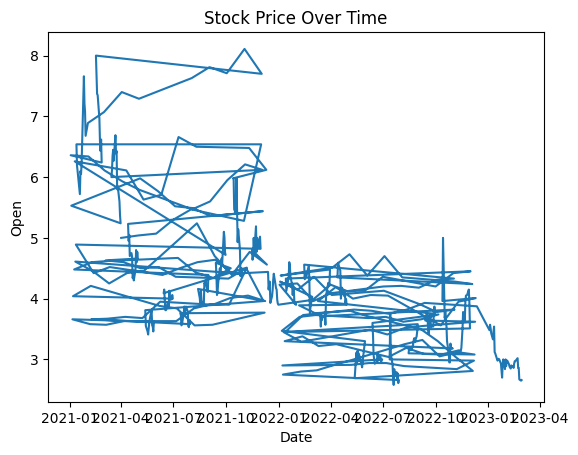

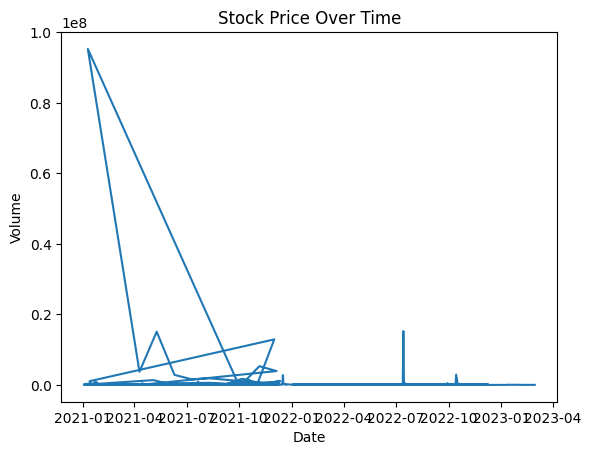

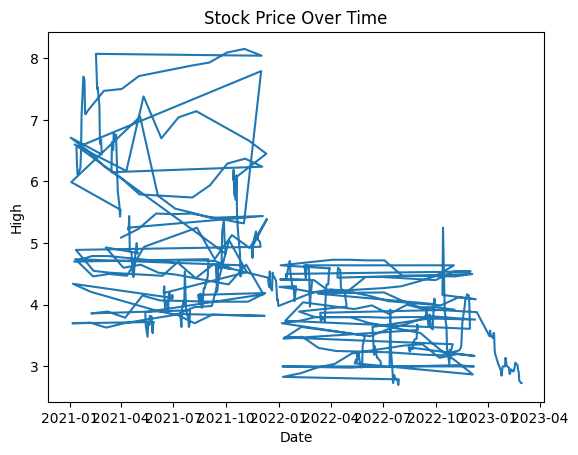

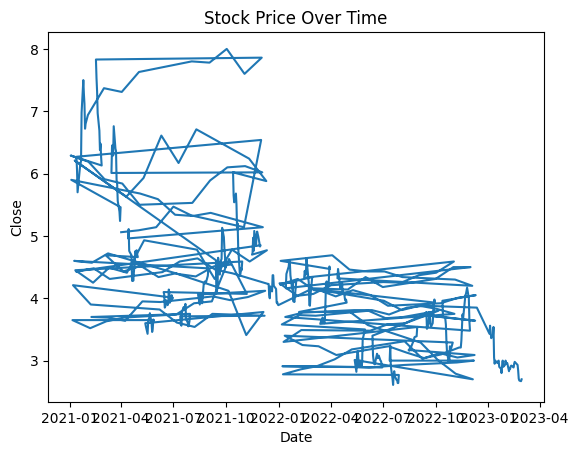

In [ ]:
for idx in range(1,len(joindf.columns.values)-1):
  plt.plot(joindf['Date'],joindf[joindf.columns[idx]])
  plt.xlabel('Date')
  plt.ylabel(joindf.columns[idx])

  plt.title('Stock Price Over Time')
  plt.show()

In [ ]:
training_set_low = joindf.iloc[:,1:2].values
training_set_open = joindf.iloc[:,2:3].values
training_set_high = joindf.iloc[:,4:5].values
training_set_close = joindf.iloc[:,5:6].values
training_set_low.shape, joindf.shape
training_set_open.shape, joindf.shape
training_set_high.shape, joindf.shape
training_set_close.shape, joindf.shape

((528, 1), (528, 7))

In [ ]:
training_set_open

array([[5.        ],
       [5.03999996],
       [5.07000017],
       [5.30000019],
       [5.46999979],
       [5.28000021],
       [6.53999996],
       [6.53999996],
       [6.19000006],
       [6.0999999 ],
       [5.71999979],
       [6.0999999 ],
       [6.05000019],
       [6.21999979],
       [7.28999996],
       [7.65999985],
       [7.21000004],
       [7.07999992],
       [6.67999983],
       [6.88999987],
       [7.07000017],
       [7.4000001 ],
       [7.28999996],
       [7.63000011],
       [7.80999994],
       [7.71000004],
       [8.10999966],
       [7.69999981],
       [8.        ],
       [7.67999983],
       [7.36999989],
       [7.3499999 ],
       [6.96999979],
       [6.59000015],
       [6.42999983],
       [6.61999989],
       [6.23999977],
       [6.36000013],
       [6.34000015],
       [6.11000013],
       [5.92999983],
       [5.78999996],
       [5.46999979],
       [5.5999999 ],
       [5.94999981],
       [6.21000004],
       [6.11999989],
       [6.   

In [ ]:
training_set_low

array([[4.94999981],
       [5.01000023],
       [5.03000021],
       [5.23000002],
       [5.23999977],
       [5.01000023],
       [6.13999987],
       [5.86000013],
       [5.76000023],
       [5.57000017],
       [5.71999979],
       [5.94999981],
       [6.05000019],
       [6.21999979],
       [6.80000019],
       [7.01000023],
       [7.01000023],
       [6.3499999 ],
       [6.65999985],
       [6.76000023],
       [6.9000001 ],
       [7.11999989],
       [7.21000004],
       [7.44999981],
       [7.67999983],
       [7.4000001 ],
       [7.5999999 ],
       [7.61000013],
       [7.67000008],
       [7.30000019],
       [7.19000006],
       [6.84000015],
       [6.61999989],
       [6.11999989],
       [6.36000013],
       [6.19999981],
       [5.96000004],
       [6.23999977],
       [6.13000011],
       [5.9000001 ],
       [5.61000013],
       [5.17999983],
       [5.46000004],
       [5.5       ],
       [5.94999981],
       [5.98000002],
       [5.96999979],
       [5.969

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
training_set_scaled_low = scaler.fit_transform(training_set_low)
training_set_scaled_open = scaler.fit_transform(training_set_open)
training_set_scaled_high = scaler.fit_transform(training_set_high)
training_set_scaled_close = scaler.fit_transform(training_set_close)

In [ ]:
x_train_low = []
y_train_low = []

for i in range(10,528):
  x_train_low.append(training_set_scaled_low[i-10:i,0])
  y_train_low.append(training_set_scaled_low[i,0])

x_train_low, y_train_low = np.array(x_train_low),np.array(y_train_low)

In [ ]:
x_train_open = []
y_train_open = []

for i in range(10,528):
  x_train_open.append(training_set_scaled_open[i-10:i,0])
  y_train_open.append(training_set_scaled_open[i,0])

x_train_open, y_train_open = np.array(x_train_open),np.array(y_train_open)

In [ ]:
x_train_high = []
y_train_high = []

for i in range(10,528):
  x_train_high.append(training_set_scaled_high[i-10:i,0])
  y_train_high.append(training_set_scaled_high[i,0])

x_train_high, y_train_high = np.array(x_train_high),np.array(y_train_high)

In [ ]:
x_train_close = []
y_train_close = []

for i in range(10,528):
  x_train_close.append(training_set_scaled_close[i-10:i,0])
  y_train_close.append(training_set_scaled_close[i,0])

x_train_close, y_train_close = np.array(x_train_close),np.array(y_train_close)

In [ ]:
x_train_low.shape

(518, 10)

In [ ]:
x_train_low = x_train_low.reshape(518,10,1)
x_train_open = x_train_open.reshape(518,10,1)
x_train_high = x_train_high.reshape(518,10,1)
x_train_close = x_train_close.reshape(518,10,1)

### Build LSTM Model and do training using keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

modelkeraslow = Sequential([layers.Input((10, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

modelkeraslow.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

modelkeraslow.fit(x_train_low, y_train_low, epochs=100)

Epoch 1/100
17/17 [==============================] - 4s 9ms/step - loss: 0.1065 - mean_absolute_error: 0.2550
Epoch 2/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0281 - mean_absolute_error: 0.1266
Epoch 3/100
17/17 [==============================] - 0s 9ms/step - loss: 0.0081 - mean_absolute_error: 0.0663
Epoch 4/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0037 - mean_absolute_error: 0.0459
Epoch 5/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0035 - mean_absolute_error: 0.0450
Epoch 6/100
17/17 [==============================] - 0s 10ms/step - loss: 0.0032 - mean_absolute_error: 0.0423
Epoch 7/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0029 - mean_absolute_error: 0.0402
Epoch 8/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0027 - mean_absolute_error: 0.0391
Epoch 9/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0028 - mean_absolute_error: 0.0391
Epoch 10/

In [ ]:
modelkerasopen = Sequential([layers.Input((10, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

modelkerasopen.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

modelkerasopen.fit(x_train_open, y_train_open, epochs=100)

Epoch 1/100
17/17 [==============================] - 3s 10ms/step - loss: 0.0735 - mean_absolute_error: 0.1994
Epoch 2/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0110 - mean_absolute_error: 0.0870
Epoch 3/100
17/17 [==============================] - 0s 9ms/step - loss: 0.0064 - mean_absolute_error: 0.0594
Epoch 4/100
17/17 [==============================] - 0s 9ms/step - loss: 0.0042 - mean_absolute_error: 0.0471
Epoch 5/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0039 - mean_absolute_error: 0.0456
Epoch 6/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0036 - mean_absolute_error: 0.0429
Epoch 7/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0034 - mean_absolute_error: 0.0420
Epoch 8/100
17/17 [==============================] - 0s 9ms/step - loss: 0.0032 - mean_absolute_error: 0.0409
Epoch 9/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0404
Epoch 10/

In [ ]:
modelkerashigh = Sequential([layers.Input((10, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

modelkerashigh.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

modelkerashigh.fit(x_train_high, y_train_high, epochs=100)

Epoch 1/100
17/17 [==============================] - 4s 14ms/step - loss: 0.0595 - mean_absolute_error: 0.1747
Epoch 2/100
17/17 [==============================] - 0s 13ms/step - loss: 0.0117 - mean_absolute_error: 0.0838
Epoch 3/100
17/17 [==============================] - 0s 13ms/step - loss: 0.0064 - mean_absolute_error: 0.0607
Epoch 4/100
17/17 [==============================] - 0s 13ms/step - loss: 0.0051 - mean_absolute_error: 0.0529
Epoch 5/100
17/17 [==============================] - 0s 13ms/step - loss: 0.0049 - mean_absolute_error: 0.0507
Epoch 6/100
17/17 [==============================] - 0s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0478
Epoch 7/100
17/17 [==============================] - 0s 15ms/step - loss: 0.0043 - mean_absolute_error: 0.0466
Epoch 8/100
17/17 [==============================] - 0s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0458
Epoch 9/100
17/17 [==============================] - 0s 10ms/step - loss: 0.0039 - mean_absolute_error: 0.0440
E

In [ ]:
modelkerasclose = Sequential([layers.Input((10, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

modelkerasclose.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

modelkerasclose.fit(x_train_close, y_train_close, epochs=100)

Epoch 1/100
17/17 [==============================] - 3s 9ms/step - loss: 0.0698 - mean_absolute_error: 0.1981
Epoch 2/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0118 - mean_absolute_error: 0.0886
Epoch 3/100
17/17 [==============================] - 0s 9ms/step - loss: 0.0074 - mean_absolute_error: 0.0642
Epoch 4/100
17/17 [==============================] - 0s 9ms/step - loss: 0.0049 - mean_absolute_error: 0.0521
Epoch 5/100
17/17 [==============================] - 0s 9ms/step - loss: 0.0047 - mean_absolute_error: 0.0505
Epoch 6/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0042 - mean_absolute_error: 0.0482
Epoch 7/100
17/17 [==============================] - 0s 9ms/step - loss: 0.0042 - mean_absolute_error: 0.0481
Epoch 8/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0039 - mean_absolute_error: 0.0457
Epoch 9/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0038 - mean_absolute_error: 0.0452
Epoch 10/1

### Prepare data test from 1st march to 5th april i get from yahoo finance

In [ ]:
testdata = pd.read_csv('/content/tes_BMRA.csv')
testdata

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-01,2.67,2.77,2.65,2.69,2.69,11700
1,2023-03-02,2.78,2.78,2.74,2.78,2.78,17600
2,2023-03-03,2.50,2.50,2.25,2.25,2.25,513000
3,2023-03-06,2.25,2.40,2.25,2.25,2.25,72800
4,2023-03-07,2.25,2.34,2.25,2.29,2.29,32600
5,2023-03-08,2.33,2.48,2.33,2.40,2.40,35300
6,2023-03-09,2.40,2.40,2.35,2.38,2.38,9600
7,2023-03-10,2.42,2.42,2.28,2.31,2.31,17900
8,2023-03-13,2.47,2.47,2.29,2.38,2.38,28300
9,2023-03-14,2.31,2.40,2.31,2.31,2.31,29700


In [ ]:
testdata['Open']

0     2.67
1     2.78
2     2.50
3     2.25
4     2.25
5     2.33
6     2.40
7     2.42
8     2.47
9     2.31
10    2.28
11    2.30
12    2.25
13    2.29
14    2.31
15    2.20
16    1.86
17    1.87
18    1.98
19    1.94
20    1.85
21    1.88
22    1.86
23    1.85
24    1.82
25    1.80
Name: Open, dtype: float64

In [ ]:
joindf['Open']

0      5.00
1      5.04
2      5.07
3      5.30
4      5.47
       ... 
523    2.86
524    2.86
525    2.67
526    2.65
527    2.66
Name: Open, Length: 528, dtype: float64

In [ ]:
testdata.iloc[:,0:1].values

array([['2023-03-01'],
       ['2023-03-02'],
       ['2023-03-03'],
       ['2023-03-06'],
       ['2023-03-07'],
       ['2023-03-08'],
       ['2023-03-09'],
       ['2023-03-10'],
       ['2023-03-13'],
       ['2023-03-14'],
       ['2023-03-15'],
       ['2023-03-16'],
       ['2023-03-17'],
       ['2023-03-20'],
       ['2023-03-21'],
       ['2023-03-22'],
       ['2023-03-23'],
       ['2023-03-24'],
       ['2023-03-27'],
       ['2023-03-28'],
       ['2023-03-29'],
       ['2023-03-30'],
       ['2023-03-31'],
       ['2023-04-03'],
       ['2023-04-04'],
       ['2023-04-05']], dtype=object)

In [ ]:
real_stock_price_low = testdata.iloc[:,3:4].values
real_stock_price_open = testdata.iloc[:,1:2].values
real_stock_price_high = testdata.iloc[:,2:3].values
real_stock_price_close = testdata.iloc[:,4:5].values

In [ ]:
real_stock_price_close

array([[2.69],
       [2.78],
       [2.25],
       [2.25],
       [2.29],
       [2.4 ],
       [2.38],
       [2.31],
       [2.38],
       [2.31],
       [2.26],
       [2.3 ],
       [2.26],
       [2.26],
       [2.23],
       [1.86],
       [1.92],
       [1.98],
       [1.99],
       [1.87],
       [1.88],
       [1.88],
       [1.87],
       [1.85],
       [1.79],
       [1.74]])

### Do the prediction, Evaluating MAE, MSE, and Vizualize real and prediction stock market for low, open, high, and close

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def RMSE(true,predicted):
  RMSE = mean_squared_error(true,predicted,squared=True)
  return RMSE

In [ ]:
#concatination

dataset_total_low = pd.concat((joindf['Low'],testdata['Low']), axis=0)
inputs_low = dataset_total_low[len(dataset_total_low)-len(testdata)-10:].values

inputs_low = inputs_low.reshape(-1,1)

inputs_low = scaler.transform(inputs_low)

x_test_low = []
for i in range(10,36):
  x_test_low.append(inputs_low[i-10:i, 0])

x_test_low = np.array(x_test_low)
x_test_low = np.reshape(x_test_low,(x_test_low.shape[0],x_test_low.shape[1],1))

# Do prediction using LSTM Model
predicted_stock_price_low = modelkeraslow.predict(x_test_low)
predicted_stock_price_low = scaler.inverse_transform(predicted_stock_price_low)

# Do the evaluation for LSTM Model
mae_low = mean_absolute_error(predicted_stock_price_low,real_stock_price_low)
rmse_low = RMSE(real_stock_price_low,predicted_stock_price_low)
print(mae_low)
print(rmse_low)

1/1 [==============================] - 1s 1s/step
0.4185673405573918
0.22611340432007931


In [ ]:
#concatination for LSTM Model

dataset_total_open = pd.concat((joindf['Open'],testdata['Open']), axis=0)
inputs_open = dataset_total_open[len(dataset_total_open)-len(testdata)-10:].values

inputs_open = inputs_open.reshape(-1,1)

inputs_open = scaler.transform(inputs_open)

x_test_open = []
for i in range(10,36):
  x_test_open.append(inputs_open[i-10:i, 0])

x_test_open = np.array(x_test_open)

x_test_open = np.reshape(x_test_open,(x_test_open.shape[0],x_test_open.shape[1],1))

# Predict using LSTM
predicted_stock_price_open = modelkerasopen.predict(x_test_open)
predicted_stock_price_open = scaler.inverse_transform(predicted_stock_price_open)

# Do the evaluation for LSTM Model
mae_open = mean_absolute_error(predicted_stock_price_open,real_stock_price_open)
rmse_open = RMSE(real_stock_price_open,predicted_stock_price_open)
print(mae_open)
print(rmse_open)

1/1 [==============================] - 1s 699ms/step
0.4871901031640859
0.29984905064766615


In [ ]:
#concatination

dataset_total_high = pd.concat((joindf['High'],testdata['High']), axis=0)
inputs_high = dataset_total_high[len(dataset_total_high)-len(testdata)-10:].values

inputs_high = inputs_high.reshape(-1,1)

inputs_high = scaler.transform(inputs_high)

x_test_high = []
for i in range(10,36):
  x_test_high.append(inputs_high[i-10:i, 0])

x_test_high = np.array(x_test_high)

x_test_high = np.reshape(x_test_high,(x_test_high.shape[0],x_test_high.shape[1],1))
predicted_stock_price_high = modelkerashigh.predict(x_test_high)
predicted_stock_price_high = scaler.inverse_transform(predicted_stock_price_high)

mae_high = mean_absolute_error(predicted_stock_price_high,real_stock_price_high)
rmse_high = RMSE(real_stock_price_high,predicted_stock_price_high)
print(mae_high)
print(rmse_high)

1/1 [==============================] - 1s 652ms/step
0.38621385024144106
0.19785753463989694


In [ ]:
#concatination

dataset_total_close = pd.concat((joindf['Close'],testdata['Open']), axis=0)
inputs_close = dataset_total_close[len(dataset_total_close)-len(testdata)-10:].values

inputs_close = inputs_close.reshape(-1,1)

inputs_close = scaler.transform(inputs_close)

x_test_close = []
for i in range(10,36):
  x_test_close.append(inputs_close[i-10:i, 0])

x_test_close = np.array(x_test_close)
x_test_close = np.reshape(x_test_close,(x_test_close.shape[0],x_test_close.shape[1],1))

# Predict using LSTM Model
predicted_stock_price_close = modelkerasclose.predict(x_test_close)
predicted_stock_price_close = scaler.inverse_transform(predicted_stock_price_close)

# Do the evaluation for LSTM Model
mae_close = mean_absolute_error(predicted_stock_price_close,real_stock_price_close)
rmse_close = RMSE(real_stock_price_close,predicted_stock_price_close)
print(mae_close)
print(rmse_close)

1/1 [==============================] - 1s 702ms/step
0.4810053597963773
0.2913479723819369


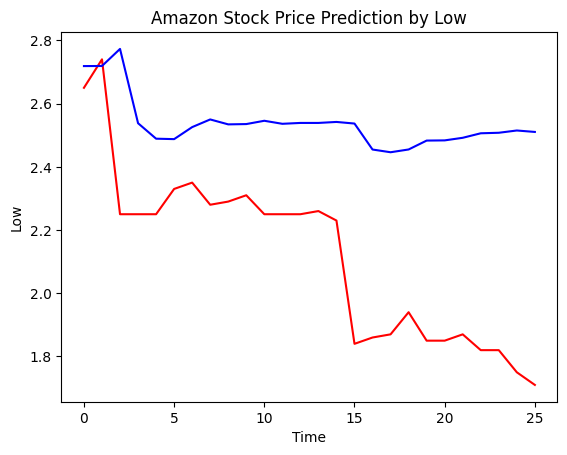

In [ ]:
plt.plot(real_stock_price_low,color='red',label='Real Amazon Stock Price by Low')
plt.plot(predicted_stock_price_low,color='blue',label='Predicted Amazon Stock Price by Low')
plt.title('Amazon Stock Price Prediction by Low')
plt.xlabel('Time')
plt.ylabel('Low')
plt.legend
plt.show()

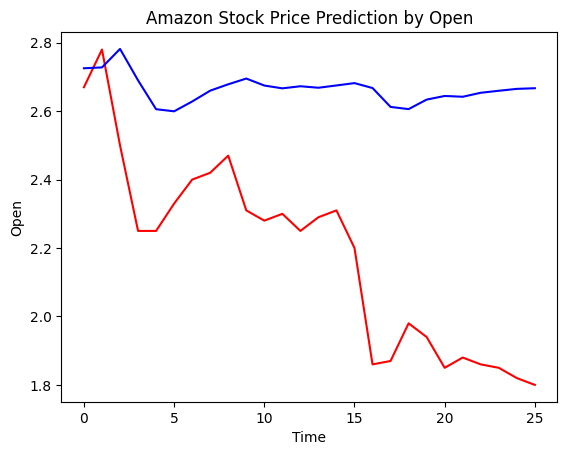

In [ ]:
plt.plot(real_stock_price_open,color='red',label='Real Amazon Stock Price')
plt.plot(predicted_stock_price_open,color='blue',label='Predicted Amazon Stock Price using LSTM')
plt.title('Amazon Stock Price Prediction by Open')
plt.xlabel('Time')
plt.ylabel('Open')
plt.legend
plt.show()

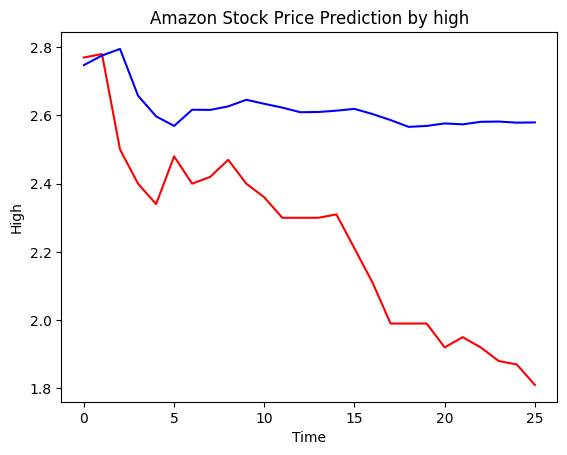

In [ ]:
plt.plot(real_stock_price_high,color='red',label='Real Amazon Stock Price')
plt.plot(predicted_stock_price_high,color='blue',label='Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction by high')
plt.xlabel('Time')
plt.ylabel('High')
plt.legend
plt.show()

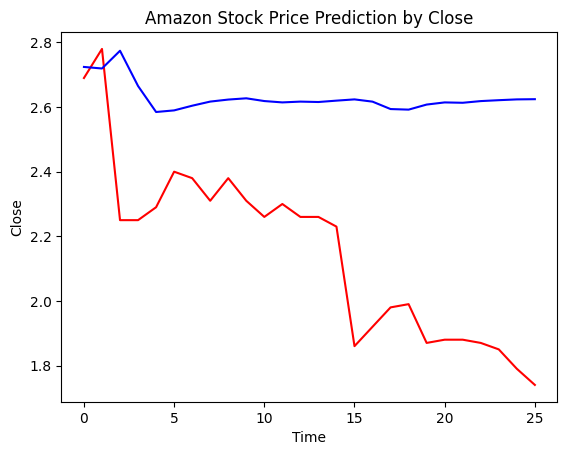

In [ ]:
plt.plot(real_stock_price_close,color='red',label='Real Amazon Stock Price')
plt.plot(predicted_stock_price_close,color='blue',label='Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction by Close')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend
plt.show()